In [1]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import seaborn as sns

tqdm.pandas()

In [2]:
df = pd.read_csv("/Users/bezatezera/Desktop/Data/amazonSales/Amazon_sales_analytics/project3/data/cleaned_reviews.csv")
df.head()


,review_id,user_id,product_id,review_title,review_content,cleaned_review,cleaned_length
0,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,look durable charging fine toono complainschar...,36
1,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,ordered cable connect phone android auto car c...,113
2,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",quite durable sturdy good nice productworking ...,10
3,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",good productlong wirecharges goodnicei bought ...,40
4,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",bought instead original apple work fast apple ...,227


In [3]:
sia = SentimentIntensityAnalyzer()

df['vader_scores'] = df['cleaned_review'].progress_apply(lambda x: sia.polarity_scores(str(x)))
df['compound'] = df['vader_scores'].apply(lambda x: x['compound'])


100%|██████████| 1465/1465 [00:01<00:00, 824.05it/s]


In [4]:
def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    
    elif score <= -0.05:
        return "Negative"
    
    else:
        return "Neutral"

df['sentiment'] = df['compound'].apply(classify_sentiment)

print(df[['cleaned_review', 'sentiment', 'compound']].head())

                                      cleaned_review sentiment  compound
0  look durable charging fine toono complainschar...  Positive    0.9419
1  ordered cable connect phone android auto car c...  Positive    0.9750
2  quite durable sturdy good nice productworking ...  Positive    0.8300
3  good productlong wirecharges goodnicei bought ...  Positive    0.9393
4  bought instead original apple work fast apple ...  Positive    0.9926


In [11]:
output = "/Users/bezatezera/Desktop/Data/amazonSales/Amazon_sales_analytics/project3/data/reviews_with_sentiment.csv"
df[['cleaned_review', 'compound', 'sentiment']].to_csv(output, index=False)

print("Sentiment results saved successfully!")

Sentiment results saved successfully!


In [17]:
output = "/Users/bezatezera/Desktop/Data/amazonSales/Amazon_sales_analytics/project3/data/reviews_with_setiment(full_file).csv"
df.to_csv(output, index=False)


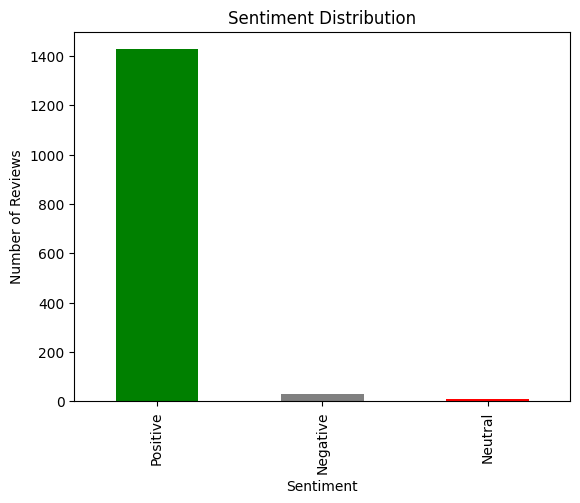

In [5]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind ='bar', color=['green', 'grey', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.savefig('../results/visualization/sentiment_distribution.png')
plt.show()

In [18]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment_percent = df['sentiment'].value_counts(normalize=True)*100
print(sentiment_percent)

sentiment
Positive    1427
Negative      28
Neutral       10
Name: count, dtype: int64
sentiment
Positive    97.406143
Negative     1.911263
Neutral      0.682594
Name: proportion, dtype: float64


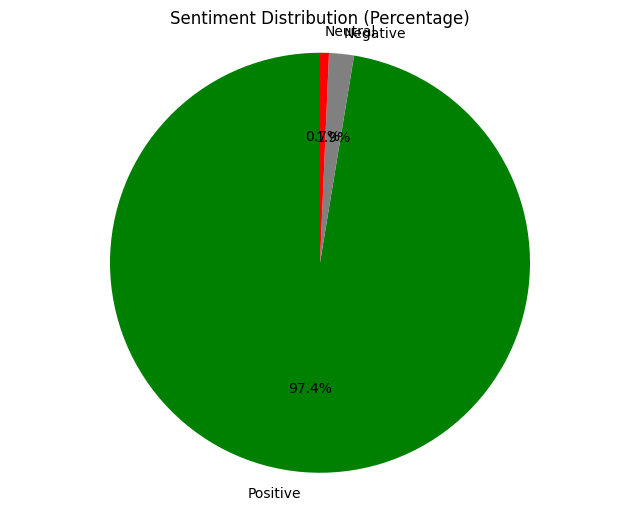

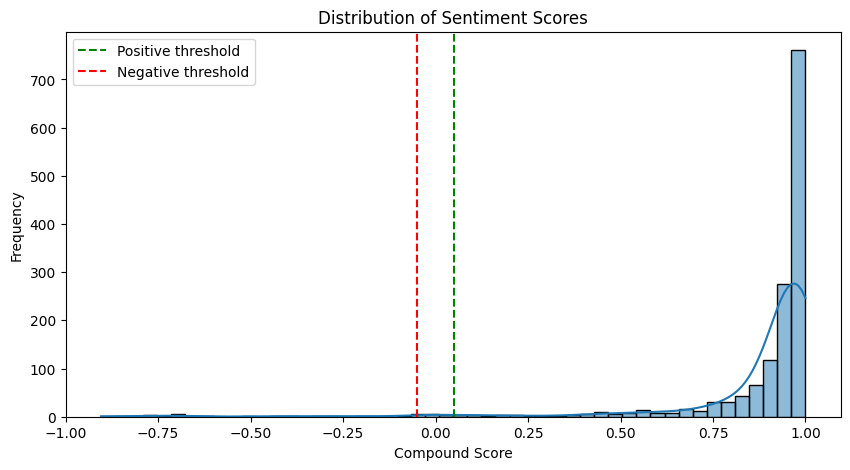

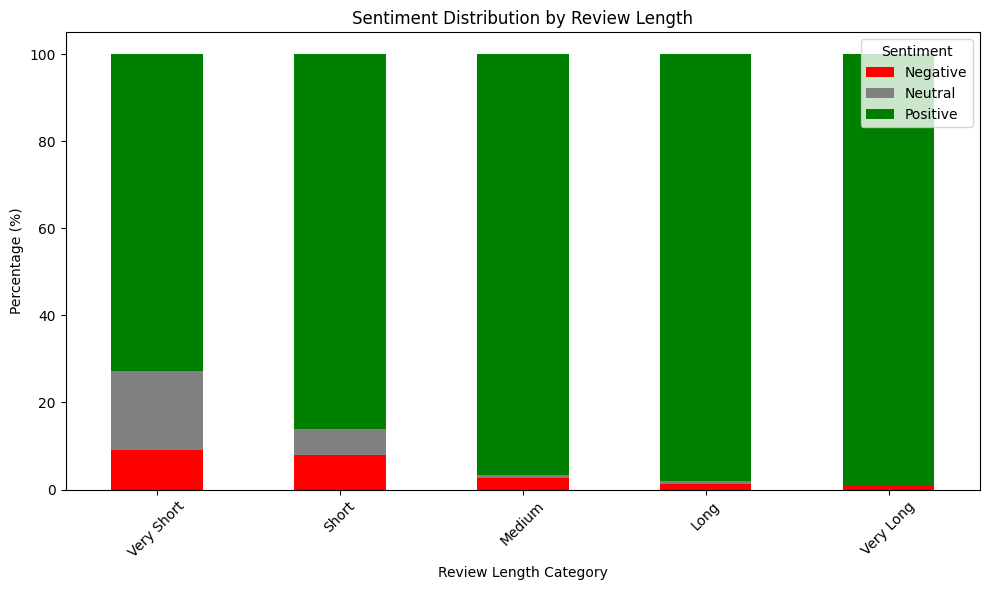

In [ ]:


# 1. Sentiment distribution pie chart
plt.figure(figsize=(8, 6))
sentiment_counts = df['sentiment'].value_counts()
colors = ['green', 'gray', 'red']
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sentiment Distribution (Percentage)')
plt.axis('equal')
plt.savefig('../results/visualization/sentiment_distribution_percentage.png')
plt.show()

# 2. Compound score distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['compound'], bins=50, kde=True)
plt.axvline(0.05, color='green', linestyle='--', label='Positive threshold')
plt.axvline(-0.05, color='red', linestyle='--', label='Negative threshold')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('../results/visualization/sentiment_score_distribution.png')
plt.show()

# 3. Sentiment by review length
df['length_category'] = pd.cut(df['cleaned_length'], 
                                bins=[0, 10, 20, 50, 100, float('inf')],
                                labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])

sentiment_by_length = pd.crosstab(df['length_category'], df['sentiment'], normalize='index') * 100

sentiment_by_length.plot(kind='bar', stacked=True, 
                          color=['red', 'gray', 'green'],
                          figsize=(10, 6))
plt.title('Sentiment Distribution by Review Length')
plt.xlabel('Review Length Category')
plt.ylabel('Percentage (%)')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../results/visualization/sentiment_distribution_review_length.png')
plt.show()